In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [3]:
# Shape of dataset
print("Shape:", df.shape)

# Column names & types
print(df.info())

# Missing values
print(df.isnull().sum())

Shape: (200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [4]:
from datetime import datetime
import numpy as np

# Drop irrelevant columns
df = df.drop(columns=['Unnamed: 0', 'key'])

# Convert pickup_datetime to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Extract time features
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday

# Define Haversine distance function
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Earth radius in km
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Calculate distance
df['distance_km'] = haversine(
    df['pickup_longitude'], df['pickup_latitude'],
    df['dropoff_longitude'], df['dropoff_latitude']
)

# Remove outliers
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 500)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

In [5]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,distance_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,6,0.112210
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,4,1.875050
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,0,12.850319
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,14,20,5,2,3.539715


         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  199268.000000     199268.000000    199268.000000      199268.000000   
mean       11.369418        -72.530113        39.937182         -72.528142   
std         9.905877         11.434234         7.723680          13.119047   
min         0.010000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991410   
50%         8.500000        -73.981825        40.752584         -73.980095   
75%        12.500000        -73.967162        40.767157         -73.963664   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count           hour            day  \
count     199268.000000    199268.000000  199268.000000  199268.000000   
mean          39.925350         1.689438      13.492618      15.705653   
std            6.794163         1.305387       6.516147       8.686854   
m

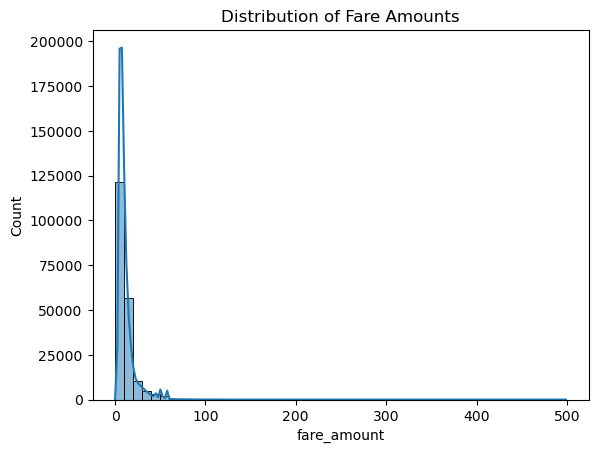

In [6]:
# Basic stats
print(df.describe())

# Check fare distribution
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Distribution of Fare Amounts")
plt.show()

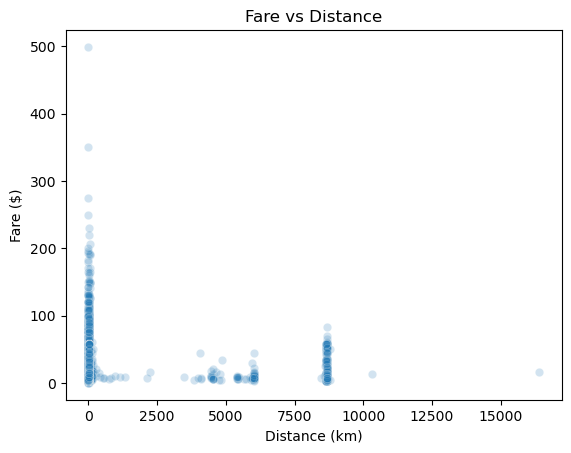

In [7]:
sns.scatterplot(x='distance_km', y='fare_amount', data=df, alpha=0.2)
plt.title("Fare vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Fare ($)")
plt.show()

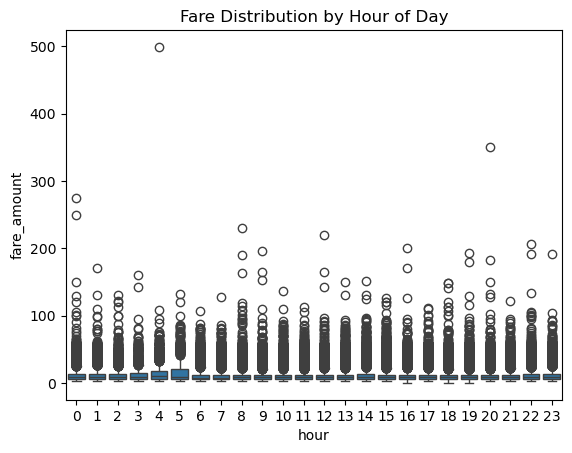

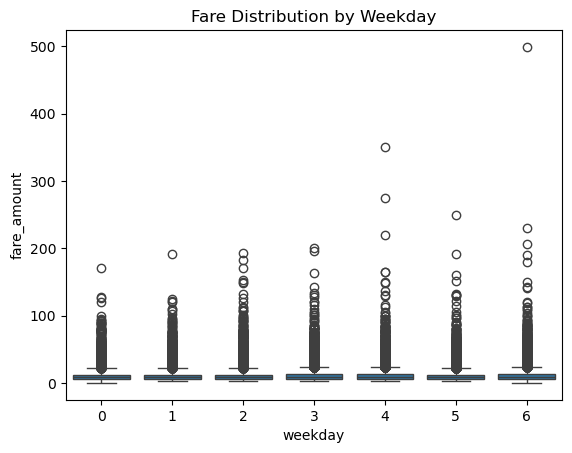

In [8]:
# Hourly trend
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title("Fare Distribution by Hour of Day")
plt.show()

# Weekday trend
sns.boxplot(x='weekday', y='fare_amount', data=df)
plt.title("Fare Distribution by Weekday")
plt.show()

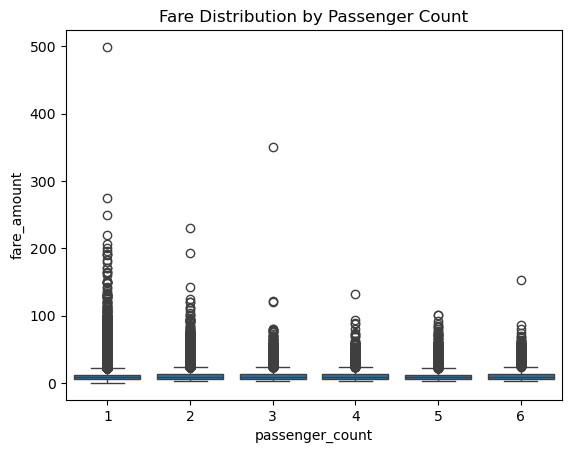

In [9]:
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Fare Distribution by Passenger Count")
plt.show()

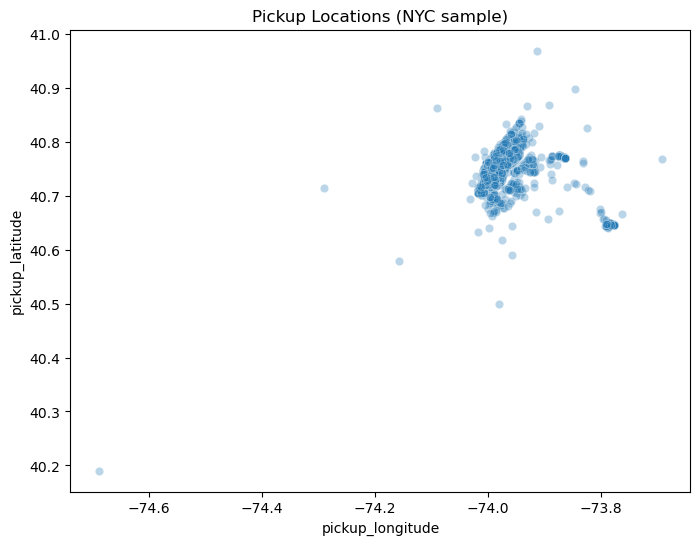

In [12]:
# Define NYC bounding box
nyc_min_long, nyc_max_long = -75, -72
nyc_min_lat, nyc_max_lat = 40, 42

# Filter to only valid NYC coordinates
df_nyc = df[
    (df['pickup_longitude'] > nyc_min_long) & (df['pickup_longitude'] < nyc_max_long) &
    (df['pickup_latitude'] > nyc_min_lat) & (df['pickup_latitude'] < nyc_max_lat)
]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='pickup_longitude',
    y='pickup_latitude',
    data=df_nyc.sample(5000),
    alpha=0.3
)
plt.title("Pickup Locations (NYC sample)")
plt.show()


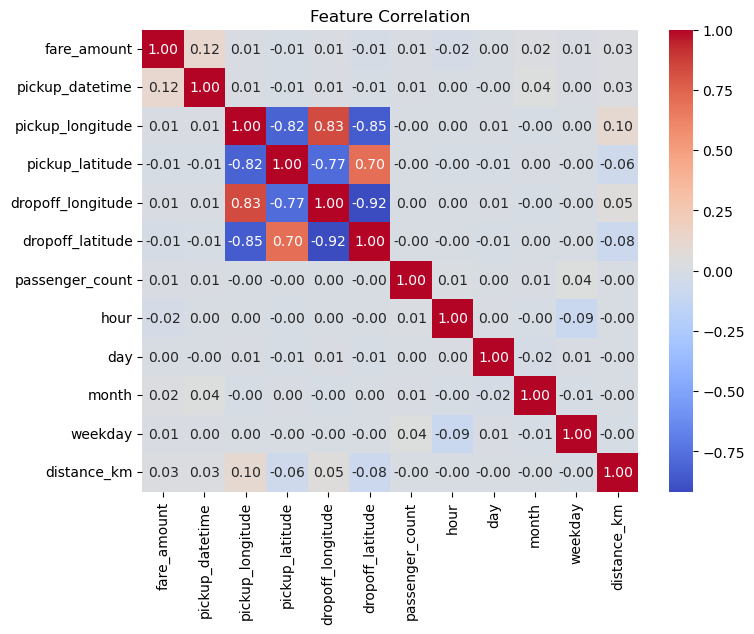

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Randomized Search (10 random combinations, 3-fold CV)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,   # number of random combinations to try
    cv=3,        # 3-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training set
rf_random.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_random.best_params_)

# Best model
best_rf = rf_random.best_estimator_

# Predictions
y_pred_best = best_rf.predict(X_test)

# Evaluation
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("\nTuned Random Forest Results:")
print("MAE:", mae_best)
print("RMSE:", rmse_best)
print("R²:", r2_best)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}

Tuned Random Forest Results:
MAE: 2.398862025667761
RMSE: 5.511776459323156
R²: 0.707250743508404


In [34]:
import joblib

# Save model
joblib.dump(best_rf, "uber_fare_rf_model.pkl")
print("Model saved as uber_fare_rf_model.pkl")

# Later, you can load it without retraining:
# loaded_model = joblib.load("uber_fare_rf_model.pkl")

Model saved as uber_fare_rf_model.pkl


In [46]:
import pandas as pd
import numpy as np
import joblib
from datetime import timedelta
import matplotlib.pyplot as plt

# Haversine distance function
def haversine(lon1, lat1, lon2, lat2):
    R = 6371
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Load trained model once
model = joblib.load("uber_fare_rf_model.pkl")

def predict_fare_with_windows_plot(pickup_long, pickup_lat, dropoff_long, dropoff_lat, pickup_datetime, passenger_count, windows=[0, 15, 30, 60]):
    pickup_datetime = pd.to_datetime(pickup_datetime)
    distance_km = haversine(pickup_long, pickup_lat, dropoff_long, dropoff_lat)

    fares = {}

    # Loop over time windows
    for w in windows:
        time = pickup_datetime + timedelta(minutes=w)
        features = pd.DataFrame([{
            'passenger_count': passenger_count,
            'hour': time.hour,
            'day': time.day,
            'month': time.month,
            'weekday': time.weekday(),
            'distance_km': distance_km
        }])

        fare = model.predict(features)[0]
        fares[w] = fare

    # Find cheapest fare
    best_window = min(fares, key=fares.get)
    best_fare = fares[best_window]
    current_fare = fares[0]

    # Suggestion message
    if best_window == 0:
        suggestion = f"Best to book now at ${current_fare:.2f}. Waiting doesn’t reduce the fare."
    else:
        future_time = (pickup_datetime + timedelta(minutes=best_window)).strftime("%H:%M")
        suggestion = f"Cheapest fare is ${best_fare:.2f} if you wait {best_window} minutes (around {future_time}). Current fare: ${current_fare:.2f}"

    # -----------------------------
    # Visualization
    # -----------------------------
    plt.figure(figsize=(8, 5))
    plt.plot(list(fares.keys()), list(fares.values()), marker='o', linestyle='-', color='b')
    plt.axhline(y=current_fare, color='r', linestyle='--', label=f"Now (${current_fare:.2f})")
    plt.scatter(best_window, best_fare, color='g', s=100, label=f"Best (${best_fare:.2f})")
    plt.title("Uber Fare Predictions Over Time Windows")
    plt.xlabel("Minutes from Now")
    plt.ylabel("Predicted Fare ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return round(current_fare, 2), suggestion, {w: round(f, 2) for w, f in fares.items()}


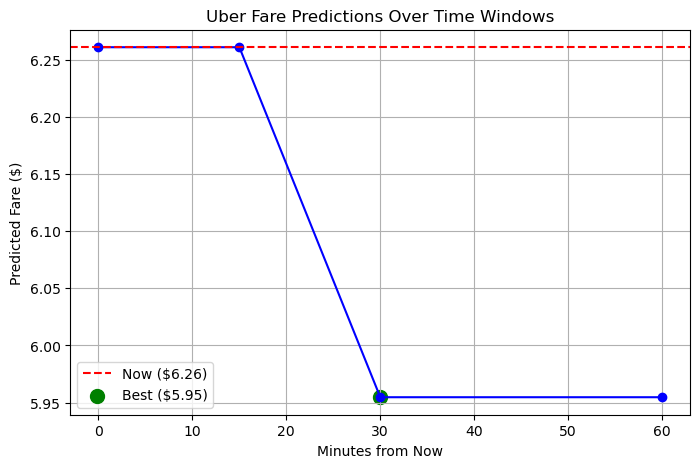

Predicted Fare Now: $ 6.26
Suggestion: Cheapest fare is $5.95 if you wait 30 minutes (around 19:00). Current fare: $6.26
Fare Estimates by Window: {0: 6.26, 15: 6.26, 30: 5.95, 60: 5.95}


In [47]:
fare, advice, all_fares = predict_fare_with_windows_plot(
    pickup_long=-73.985428, pickup_lat=40.748817,   # Empire State Building
    dropoff_long=-73.985130, dropoff_lat=40.758896, # Times Square
    pickup_datetime="2025-09-15 18:30:00",
    passenger_count=2
)

print("Predicted Fare Now: $", fare)
print("Suggestion:", advice)
print("Fare Estimates by Window:", all_fares)

C:\Users\priya\AppData\Local\Temp\ipykernel_27676\276060116.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='Blues_d')


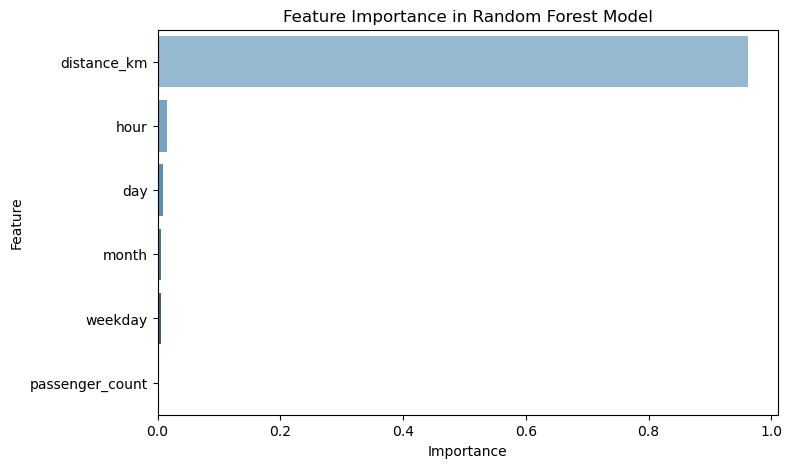

Feature Importances:
            Feature  Importance
5      distance_km    0.961989
1             hour    0.016244
2              day    0.008557
3            month    0.006243
4          weekday    0.005103
0  passenger_count    0.001865


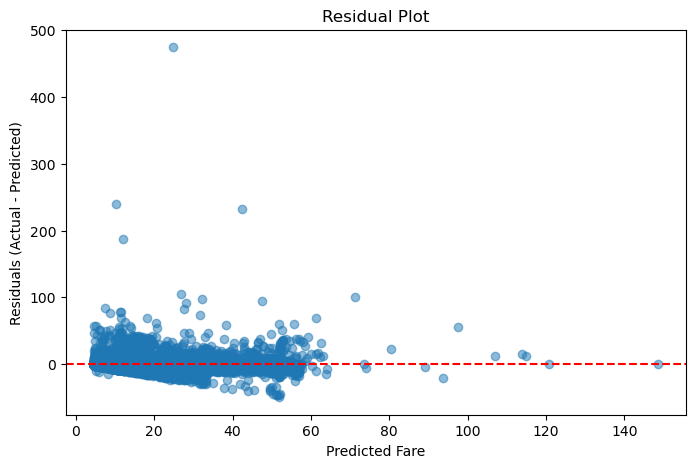

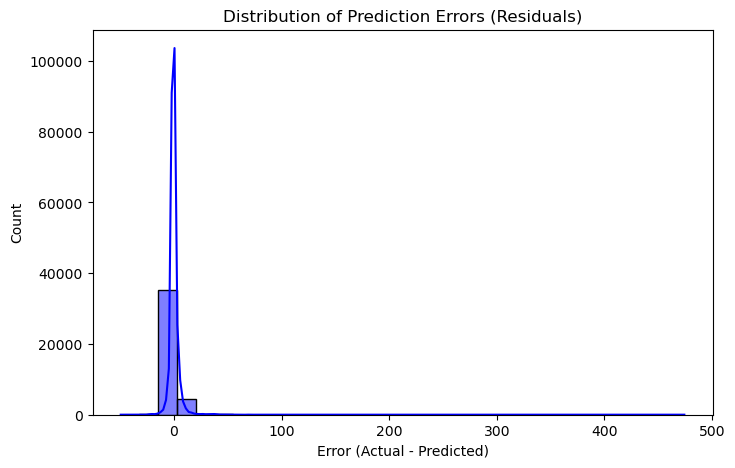

MAE: 2.39
RMSE: 5.53
R²: 0.712


In [51]:
# ===========================
# Step 3 (1): Model Insights
# ===========================

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ---------------------------
# 1. Load model & dataset
# ---------------------------
model = joblib.load("uber_fare_rf_model.pkl")

df = pd.read_csv("uber.csv")

# Target column
target = "fare_amount"
y = df[target]

# ---------------------------
# 2. Feature Engineering
# ---------------------------
def haversine(lon1, lat1, lon2, lat2):
    R = 6371
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Compute distance
df['distance_km'] = haversine(
    df['pickup_longitude'], df['pickup_latitude'],
    df['dropoff_longitude'], df['dropoff_latitude']
)

# Extract datetime parts
pickup_datetime = pd.to_datetime(df['pickup_datetime'])
df['hour'] = pickup_datetime.dt.hour
df['day'] = pickup_datetime.dt.day
df['month'] = pickup_datetime.dt.month
df['weekday'] = pickup_datetime.dt.weekday

# Features used in training
features = ['passenger_count', 'hour', 'day', 'month', 'weekday', 'distance_km']
X = df[features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Predictions
y_pred = model.predict(X_test)

# ---------------------------
# 3. Feature Importance
# ---------------------------
importances = model.feature_importances_

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='Blues_d')
plt.title("Feature Importance in Random Forest Model")
plt.show()

print("Feature Importances:\n", feat_imp)

# ---------------------------
# 4. Residual Analysis
# ---------------------------
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

# ---------------------------
# 5. Error Distribution
# ---------------------------
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Count")
plt.show()

# ---------------------------
# 6. Metrics
# ---------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

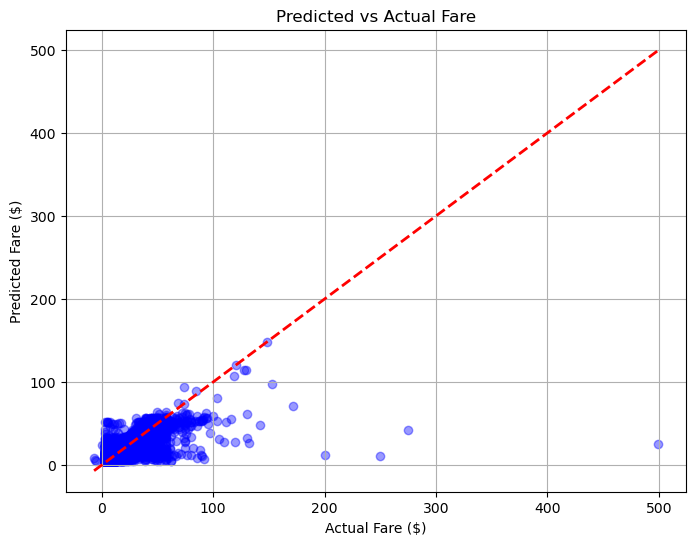

In [52]:
# ---------------------------
# Predicted vs Actual Plot
# ---------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2)  # 45° reference line
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Predicted vs Actual Fare")
plt.grid(True)
plt.show()

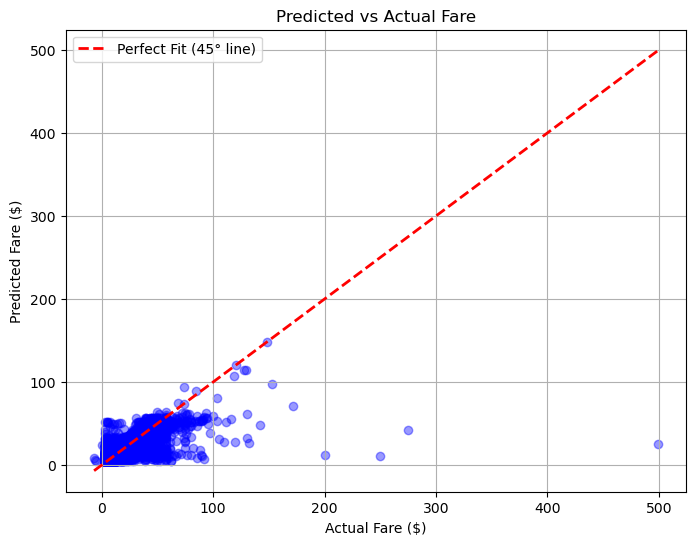

Correlation between Actual and Predicted Fares: 0.844


In [53]:
# ---------------------------
# Predicted vs Actual Plot + Correlation
# ---------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label="Perfect Fit (45° line)")
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Predicted vs Actual Fare")
plt.legend()
plt.grid(True)
plt.show()

# Correlation between actual and predicted
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Correlation between Actual and Predicted Fares: {correlation:.3f}")

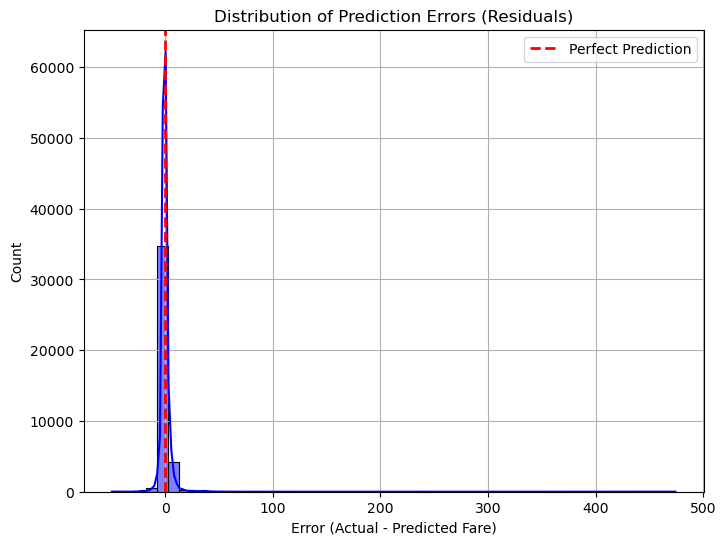

Residuals Summary:
count    40000.000000
mean         0.031898
std          5.532373
min        -49.478499
25%         -1.577772
50%         -0.510610
75%          0.921589
max        474.282457
Name: fare_amount, dtype: float64


In [54]:
# ---------------------------
# Step 3 (3): Error Distribution
# ---------------------------

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True, color="blue")
plt.axvline(0, color='red', linestyle='--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Error (Actual - Predicted Fare)")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.legend()
plt.grid(True)
plt.show()

# Summary stats
print("Residuals Summary:")
print(residuals.describe())

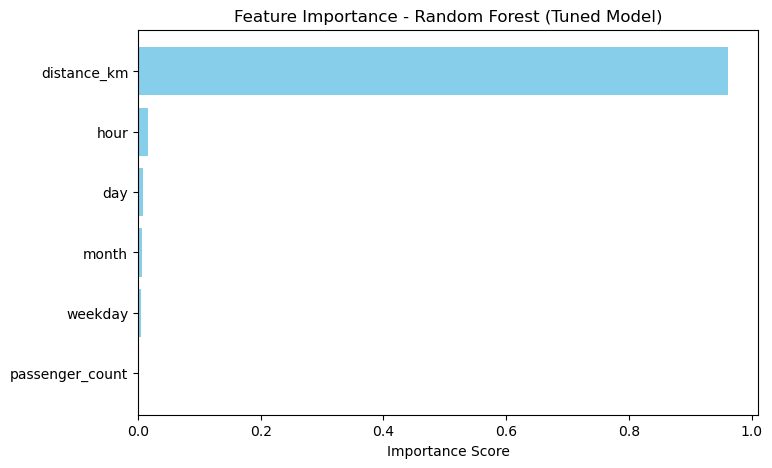


Full Feature Importance Table:
           Feature  Importance  Percentage
5      distance_km    0.961989   96.198870
1             hour    0.016244    1.624370
2              day    0.008557    0.855712
3            month    0.006243    0.624266
4          weekday    0.005103    0.510311
0  passenger_count    0.001865    0.186472

Top 5 Most Important Features:
distance_km: 0.9620 (96.20%)
hour: 0.0162 (1.62%)
day: 0.0086 (0.86%)
month: 0.0062 (0.62%)
weekday: 0.0051 (0.51%)


In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from tuned model
importances = best_rf.feature_importances_
features = X_train.columns

# Create DataFrame with percentage share
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)
feat_importance_df["Percentage"] = (feat_importance_df["Importance"] / feat_importance_df["Importance"].sum()) * 100

# Plot
plt.figure(figsize=(8,5))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest (Tuned Model)")
plt.xlabel("Importance Score")
plt.show()

# Show full table
print("\nFull Feature Importance Table:")
print(feat_importance_df)

# Show quick summary: Top 5 features with percentages
print("\nTop 5 Most Important Features:")
for i, row in feat_importance_df.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f} ({row['Percentage']:.2f}%)")


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
